# STAT - Series 1

In [1]:
# change working path to workspace folder
import os
current_path = os.getcwd()
workspace_direcotry = r"C:\Users\justi\Documents\GitHub\STAT"
os.chdir(workspace_direcotry)
from src.linear_regression import get_residual_plots # import libraries
os.chdir(current_path) # change back to original working directory

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math
import numpy as np


## Exercise 2.1
The following exercise is based on the windmill data, found in the data ﬁle
windmill.csv. We consider the following three regression models:

a) Naive: current = β0 + β1(wind speed) + ǫ

b) First-Aid Transformation: log(current) = β0 + β * log(wind speed) + ǫ

c) Transformation according to expert knowledge:
current = β0 + β1 * (1 / wind speed) + ǫ

Check by means of residual plots, for which of the three models the assumptions of the linear regression model are fulﬁlled.

In [3]:
data = pd.read_csv('./data/windmill.csv')
data.head()

,wind_speed,current
0,11.187073,1.582
1,13.424487,1.822
2,7.607209,1.057
3,6.041019,0.500
4,22.374145,2.236


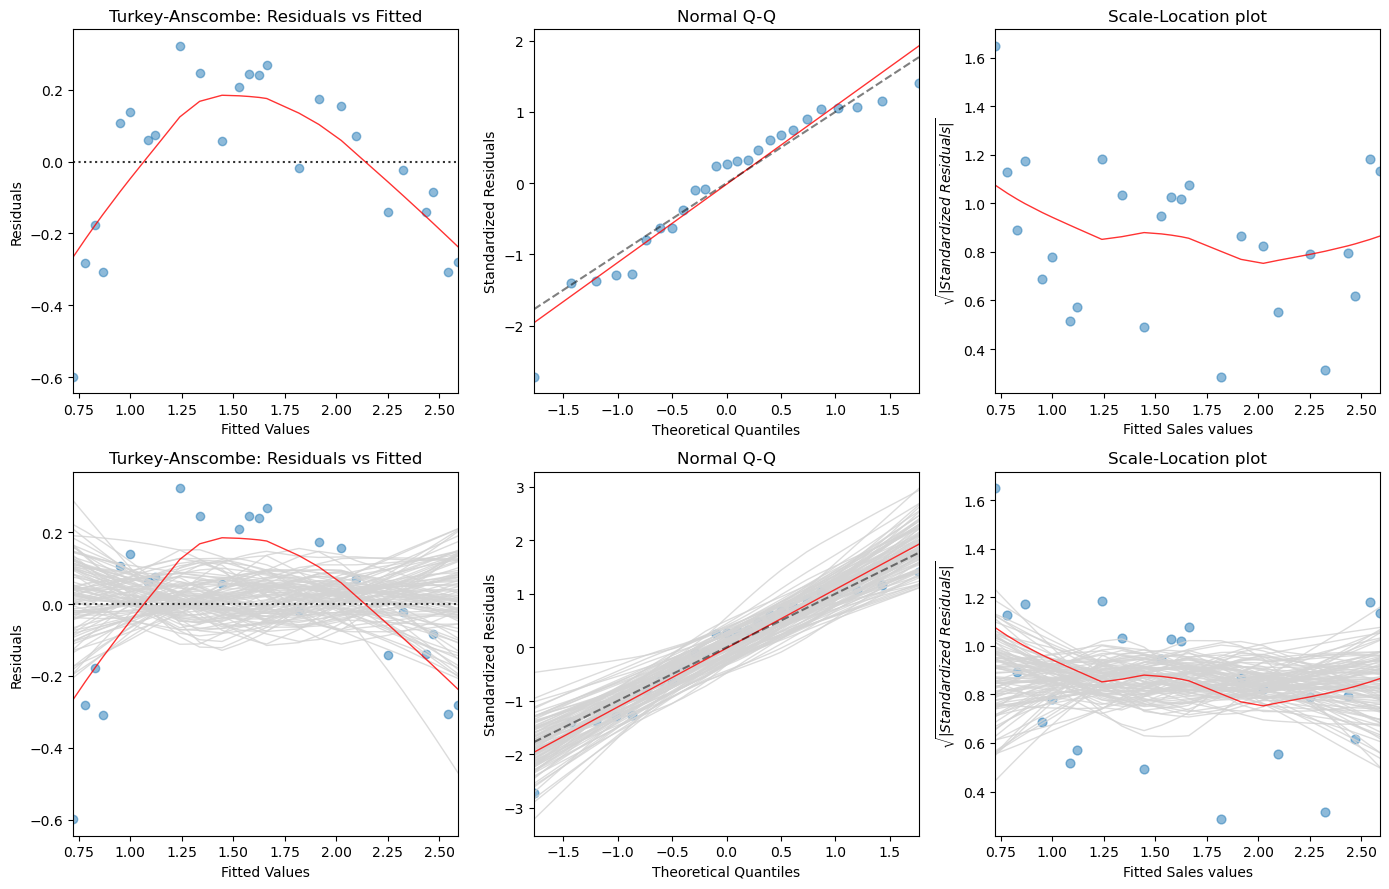

In [4]:
# 2.1 a) Naive 
x = data["wind_speed"]
y = data["current"]

x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()
fig = plt.figure(figsize = (14,9))
fig = get_residual_plots(model, fig)
plt.show()

# comment on the residual plot
# Tukey-Anscombe: The banana-like shape of the smoothing line suggests that the expected value is not constant zero. This structure is as well visible 
# in the graphics containing the simulated smoothing lines: the (red) smoothing line is not entirely contained in the grey band of simulated curves.
# 
# Normal Plot: The data points scatter next to the straight line. All data points fall into the band of curves which may arise due to statistical ﬂuctuations. 
# There is no evidence to doubt the assumption that the residuals follow a normal distribution.
#
# Scale-Location: The smoothing line tends to decrease, but it is still part of the grey band of simulated curves. Thus, there is no evidence against the 
# assumption that the variance is constant.
# 
# Conclusion: The ﬁtted model is insufﬁcient, because systematic deviations of the expected value show up. A transformation of the predictor variables may solve 
# the problem.

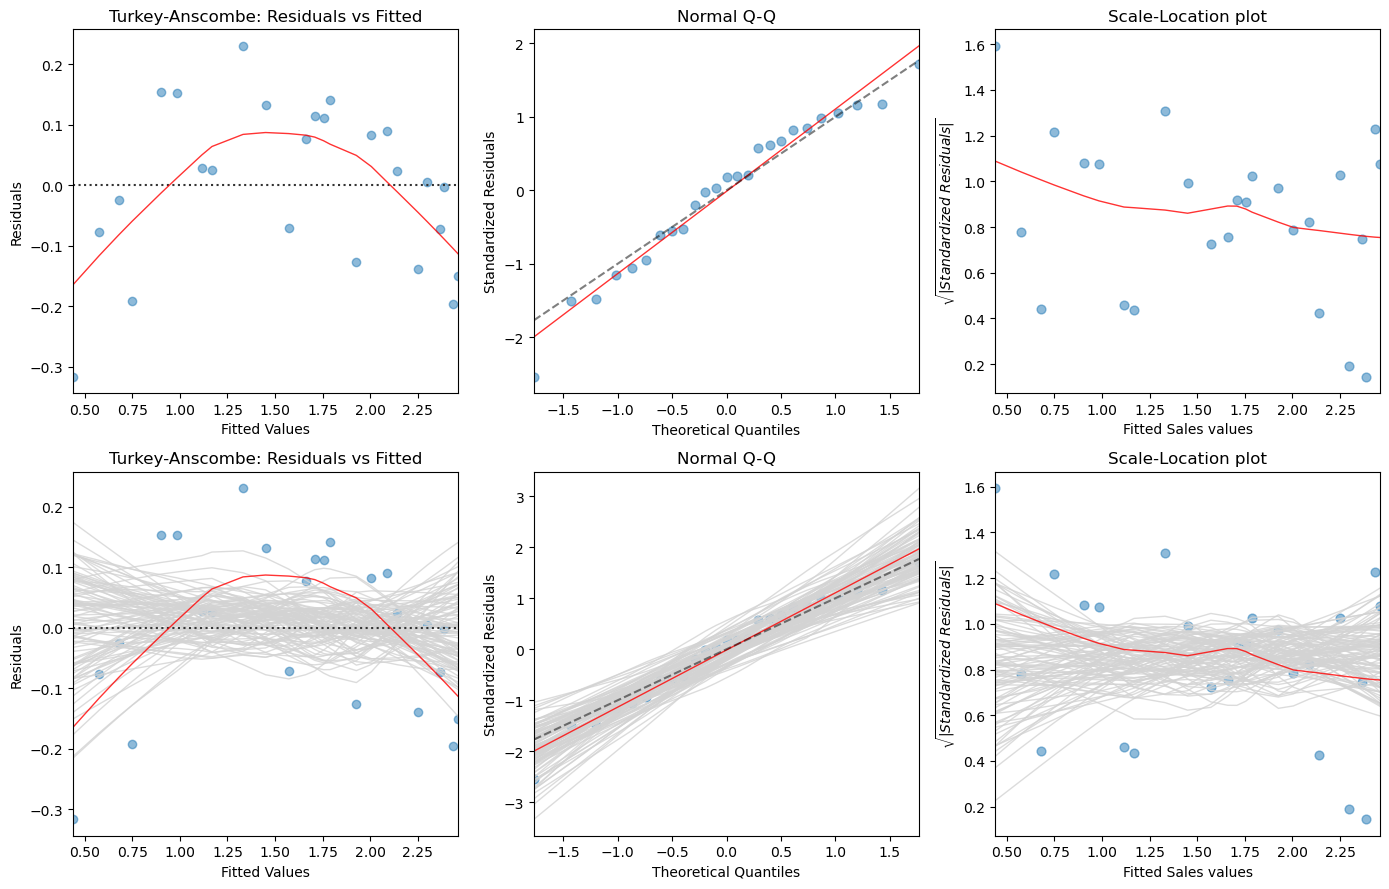

In [5]:
# 2.1 b) First aid transformation (log) 
x = np.log(data["wind_speed"])
y = data["current"]

x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()
fig = plt.figure(figsize = (14,9))
fig = get_residual_plots(model, fig)
plt.show()

# Tukey-Anscombe: The banana-like shape of the smoothing line suggests again that the expected value is not constant zero. This structure is as well 
# visible in the graphics containing the simulated curves, where the (red) smoothing line is not entirely part of the band of simulated curves.
# 
# Normal Plot: The data points scatter near to the straight line, with the exception of observation 25, which shows a strong deviation from the straight 
# line and falls outside of the band of simulated curves. This outlier seems to violate the normal distribution assumption.
# 
# Scale-Location: The smoothing line follows a wave-like curve and, in addition to that, touches the border of the grey region with the simulated curves.
#
# Conclusion: This model ﬁt is as well insufﬁcient and shows peculiarities in all three diagnosis plots.

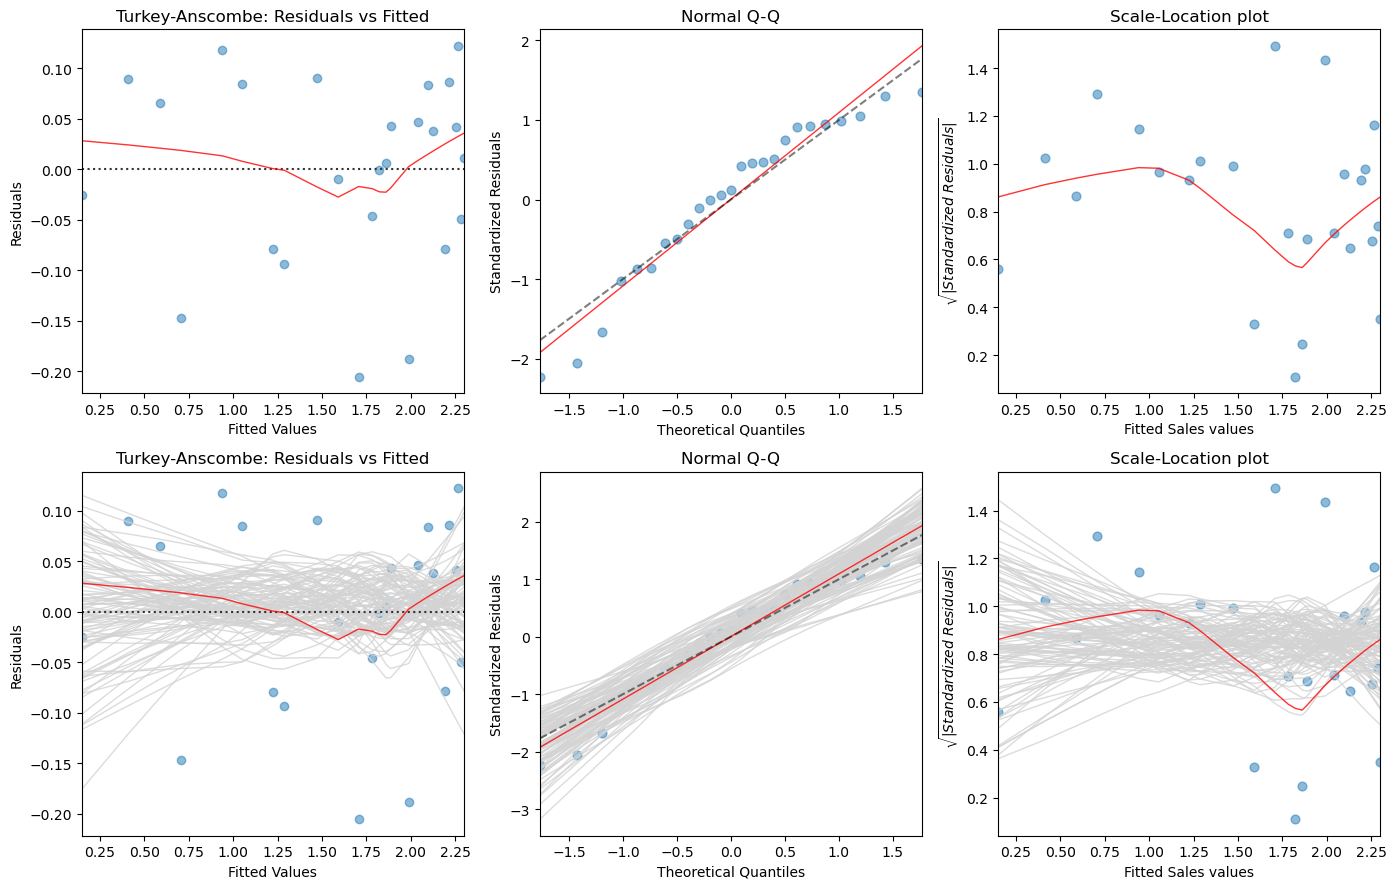

In [6]:
# 2.1 c) transofmration according to export 
x = 1 / (data["wind_speed"])
y = data["current"]

x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()
fig = plt.figure(figsize = (14,9))
fig = get_residual_plots(model, fig)
plt.show()

# Turkey-Anscombe: The smoothing line shows a slight banana-like shape, however it does not seem to be problematic according to the graphics with 
# the simulated curves, because the red curve lies inside the grey band of curves
# 
# Normal Plot: With the exception of the points at the right margin, the data points scatter nicely around the straight line. The right margin points in-
# dicate short-tailedness, which does not represent, however, a problem for the least-squares method.
# 
# Scale-Location: The smoothing line shows a dent-like pattern, which however does not represent a problem according to the simulated curves.
#
# Conclusion: The residual analysis for this model ﬁt does not show any evidence of violating the assumptions of the linear model.

## Exercise 2.2
We consider the model: yi = β0 + β1 · x_i + ǫ_i where x = 100 · log(pressure) to ﬁt the Forbesdata. 

Check with the help of residual plots, whether the assumptions
of the linear regression model are fulﬁlled.

In [ ]:
data = pd.read_csv('./data/forbes.csv')
data.head()

,y,pressure
0,194.5,20.79
1,194.3,20.79
2,197.9,22.40
3,198.4,22.67
4,199.4,23.15


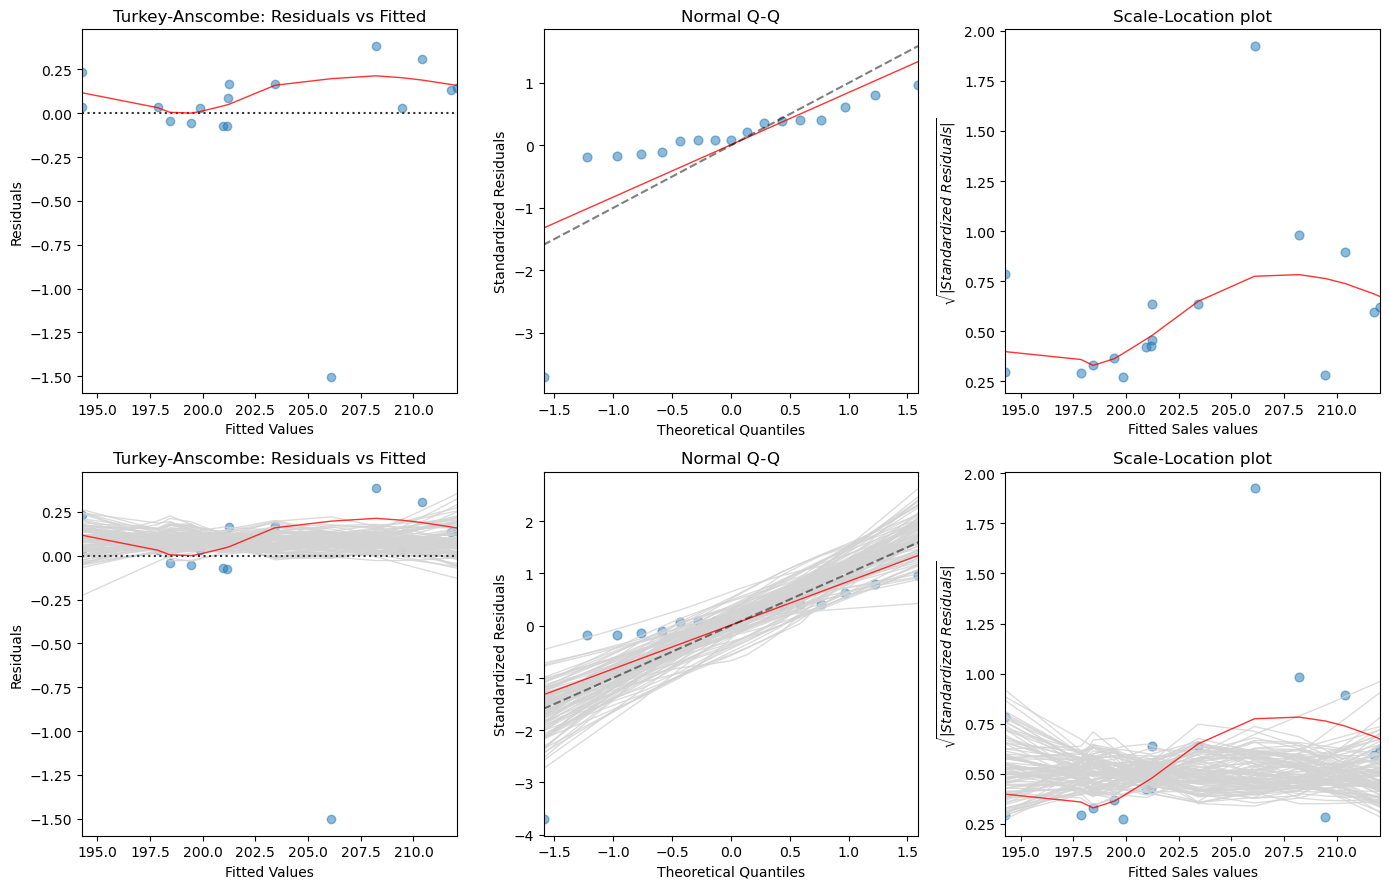

In [10]:
x = 100 * np.log(data["pressure"]) # or whatever transformation you need
y = data["y"]
x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()
fig = plt.figure(figsize = (14,9))
fig = get_residual_plots(model, fig)
plt.show()

# Analysis of the residual plots: 
# Tukey-Anscombe: The smoothing linie zeigt ein nicht linearies verhalten streut sich nicht um die Null-Linie, was darauf hinweist, dass der Erwartungswert nicht = 0 ist. 
# Jedoch liegt die Linie grauen Bereich des samplings und zeigt somit keine Beweise, dass das Modul nicht passt.
# 
# Die residuen folgen bis auf ein Ausreissen einer Normalverteilung. Aufgrund dessen, gibt es Hinweise deführ, dass die Residuen nicht normalverteilt sind.
#
# Scale-Location: Die smoothing line zeigt eine Wellenform, die jedoch nicht im grauen Bereich des samplings liegt. Somit liegend Hinweise vor, dass die
# Varianz der Residuen nicht konstant ist.
#
# Conclusion: Das Modell passt nicht. 

## Exercise 2.4
The article Characterization of Highway Runoff in Austin, Texas, Area was based on a
data set with x = rainfall volume and y = runoff volume for a particular 
location.

In [11]:
data = {
    "rainfall volume": [5, 12, 14, 17, 23, 30, 40, 47, 55, 67, 72, 81, 96, 112, 127],
    "runoff volume": [4, 10, 13, 15, 15, 25, 27, 46, 38, 46, 53, 70, 82, 99, 100]
}
data = pd.DataFrame(data)

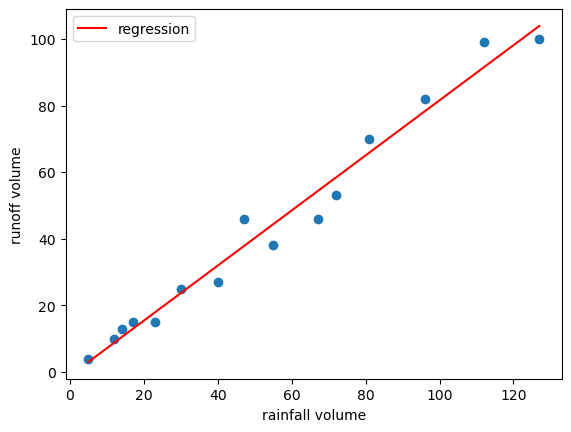

                            OLS Regression Results                            
Dep. Variable:          runoff volume   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     512.7
Date:                Sun, 30 Mar 2025   Prob (F-statistic):           7.90e-12
Time:                        14:30:46   Log-Likelihood:                -45.057
No. Observations:                  15   AIC:                             94.11
Df Residuals:                      13   BIC:                             95.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.1283      2.368     

c:\Users\justi\anaconda3\envs\FS25_STAT\lib\site-packages\scipy\stats\stats.py:1603: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=15
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


In [ ]:
# 2.4 a)
x = data["rainfall volume"]
y = data["runoff volume"]
plt.scatter(x, y)
plt.xlabel("rainfall volume")
plt.ylabel("runoff volume")

# fit simple regression model
x_sm = sm.add_constant(x)
model = sm.OLS(y, x_sm).fit()
y_reg = model.params[0] + model.params[1]* x
y_reg_sorted = y_reg.sort_values()
plt.plot(x, y_reg_sorted, 'r', label='regression')
plt.legend()
plt.show()
print(model.summary())  

In [ ]:
# 2.4 b) 